# Regressziós tesztek

Az alábbi Notebook a BME-VIK Önálló labor (AUT) tárgyához készült és beosztástervezések igazságosságával foglalkozik.

Készítette: Seben Domonkos, 2022

**Az alkalmazás célja:** Felépíteni egy keretrendszert, mely képes valamilyen egyszerűen előállítható inputokat (valamilyen kész beosztás) kiértékelni azok igazságossága szerint. Fontos tulajdonsága a problémának, hogy többdimenziós regressziót kell alkalmaznunk.

A program az alábbi dimenziókat fogja figyelembe venni:
- betöltött szerep (*vizsgáztató, bizottsági tag*)
- ráeső hallgatók száma
- oktatott tárgyak száma



### Ismerkedés a sklearn regressziós keretrendszerével

Egy [Realpython tutorial](https://realpython.com/linear-regression-in-python/) alapján. 

#### Egydimenziós lineáris regresszió:

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [9]:
model = LinearRegression().fit(x,y)

In [11]:
y_pred = model.predict(x)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [20]:
model.score(x,y)

0.715875613747954

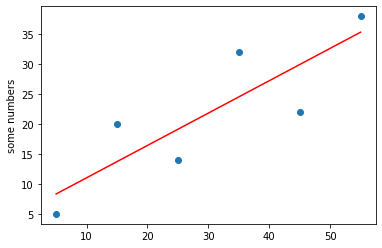

In [16]:
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.ylabel('some numbers')
plt.show()

#### Többdimenziós lineáris regresszió:

In [17]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [26]:
print('x: ', x)
print('y: ', y)

x:  [[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
y:  [ 4  5 20 14 32 22 38 43]


In [29]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.8615939258756775

In [31]:
y_pred = model.predict(x)
y_pred

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

#### Többdimenziós, polinomiális regresszió

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [35]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
x_

array([[0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [5.000e+00, 1.000e+00, 2.500e+01, 5.000e+00, 1.000e+00],
       [1.500e+01, 2.000e+00, 2.250e+02, 3.000e+01, 4.000e+00],
       [2.500e+01, 5.000e+00, 6.250e+02, 1.250e+02, 2.500e+01],
       [3.500e+01, 1.100e+01, 1.225e+03, 3.850e+02, 1.210e+02],
       [4.500e+01, 1.500e+01, 2.025e+03, 6.750e+02, 2.250e+02],
       [5.500e+01, 3.400e+01, 3.025e+03, 1.870e+03, 1.156e+03],
       [6.000e+01, 3.500e+01, 3.600e+03, 2.100e+03, 1.225e+03]])

In [43]:
model = LinearRegression().fit(x_, y)

In [41]:
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_
print('Determinációs együttható: ', r_sq)

Determinációs együttható:  0.9453701449127822


In [42]:
y_pred = model.predict(x_)
y_pred

array([ 0.54047408, 11.36340283, 16.07809622, 15.79139   , 29.73858619,
       23.50834636, 39.05631386, 41.92339046])

> A jövőben hasznos lehet egyéb modelleket is kipróbálni. Ld. [Scikit regressziós modellek](https://scikit-learn.org/stable/modules/linear_model.html)